# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** Irvandy Ilza Novendra
- **Email:** rendrairvandy@gmail.com
- **ID Dicoding:** irvandyilzan

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
- Produk apa yang paling banyak dan paling sedikit terjual?
- Bagaimana demografi pelanggan yang kita miliki?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data Wrangling

### Gathering Data

In [2]:
customers_df = pd.read_csv("data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
geolocation_df = pd.read_csv("data/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
order_items_df = pd.read_csv("data/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
order_payments_df = pd.read_csv("data/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
order_reviews_df = pd.read_csv("data/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
orders_df = pd.read_csv("data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
product_category_df = pd.read_csv("data/product_category_name_translation.csv")
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
products_df = pd.read_csv("data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
sellers_df = pd.read_csv("data/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

#### 1. memeriksa tipe data dari kolom customers dataset

In [11]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


#### 1. cek apakah ada nilai kosong atau missing value pada customers dataset

In [12]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

#### 1. Cek apakah ada data duplikasi pada customers dataset

In [13]:
# 1. Cek apakah ada data duplikasi pada customers dataset
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


#### 1. Cek parameter statistik dari kolom numerik pada customers dataset

In [14]:
# 1. Cek parameter statistik dari kolom numerik pada customers dataset
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### 2. memeriksa tipe data dari kolom geolocation dataset

In [15]:
# 2. memeriksa tipe data dari kolom geolocation dataset
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


#### 2. cek apakah ada nilai kosong atau missing value pada geolocation dataset

In [16]:
# 2. cek apakah ada nilai kosong atau missing value pada geolocation dataset
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

#### 2. Cek apakah ada data duplikasi pada geolocation dataset

In [17]:
# 2. Cek apakah ada data duplikasi pada geolocation dataset
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  261831


#### 2. Cek parameter statistik dari kolom numerik pada geolocation dataset

In [18]:
# 2. Cek parameter statistik dari kolom numerik pada geolocation dataset
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


#### 3. memeriksa tipe data dari kolom order items dataset

In [19]:
# 3. memeriksa tipe data dari kolom order items dataset
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


#### 3. cek apakah ada nilai kosong atau missing value pada order items dataset

In [20]:
# 3. cek apakah ada nilai kosong atau missing value pada order items dataset
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

#### 3. Cek apakah ada data duplikasi pada order items dataset

In [21]:
# 3. Cek apakah ada data duplikasi pada order items dataset
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


#### 3. Cek parameter statistik dari kolom numerik pada order items dataset

In [22]:
# 3. Cek parameter statistik dari kolom numerik pada order items dataset
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### 4. memeriksa tipe data dari kolom order payments dataset

In [23]:
# 4. memeriksa tipe data dari kolom order payments dataset
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


#### 4. cek apakah ada nilai kosong atau missing value pada order payments dataset

In [24]:
# 4. cek apakah ada nilai kosong atau missing value pada order payments dataset
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

#### 4. Cek apakah ada data duplikasi pada order payments dataset

In [25]:
# 4. Cek apakah ada data duplikasi pada order payments dataset
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())

Jumlah duplikasi:  0


#### 4. Cek parameter statistik dari kolom numerik pada order payments dataset

In [26]:
# 4. Cek parameter statistik dari kolom numerik pada order payments dataset
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


#### 5. memeriksa tipe data dari kolom order reviews dataset

In [27]:
# 5. memeriksa tipe data dari kolom order reviews dataset
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


#### 5. cek apakah ada nilai kosong atau missing value pada order reviews dataset

In [28]:
# 5. cek apakah ada nilai kosong atau missing value pada order reviews dataset
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

#### 5. Cek apakah ada data duplikasi pada order reviews dataset

In [29]:
# 5. Cek apakah ada data duplikasi pada order reviews dataset
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())

Jumlah duplikasi:  0


#### 5. Cek parameter statistik dari kolom numerik pada order reviews dataset

In [30]:
# 5. Cek parameter statistik dari kolom numerik pada order reviews dataset
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### 6. memeriksa tipe data dari kolom orders dataset

In [31]:
# 6. memeriksa tipe data dari kolom orders dataset
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


#### 6. cek apakah ada nilai kosong atau missing value pada orders dataset

In [32]:
# 6. cek apakah ada nilai kosong atau missing value pada orders dataset
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

#### 6. Cek apakah ada data duplikasi pada orders dataset

In [33]:
# 6. Cek apakah ada data duplikasi pada orders dataset
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


#### 6. Cek parameter statistik dari kolom numerik pada orders dataset

In [34]:
# 6. Cek parameter statistik dari kolom numerik pada orders dataset
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### 7. memeriksa tipe data dari kolom product category dataset

In [35]:
# 7. memeriksa tipe data dari kolom product category dataset
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


#### 7. cek apakah ada nilai kosong atau missing value pada product category dataset

In [36]:
# 7. cek apakah ada nilai kosong atau missing value pada product category dataset
product_category_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

#### 7. Cek apakah ada data duplikasi pada product category dataset

In [37]:
# 7. Cek apakah ada data duplikasi pada product category dataset
print("Jumlah duplikasi: ", product_category_df.duplicated().sum())

Jumlah duplikasi:  0


#### 7. Cek parameter statistik dari kolom numerik pada product category dataset

In [38]:
# 7. Cek parameter statistik dari kolom numerik pada product category dataset
product_category_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


#### 8. memeriksa tipe data dari kolom products dataset

In [39]:
# 8. memeriksa tipe data dari kolom products dataset
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


#### 8. cek apakah ada nilai kosong atau missing value pada products dataset

In [40]:
# 8. cek apakah ada nilai kosong atau missing value pada products dataset
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

#### 8. Cek apakah ada data duplikasi pada products dataset

In [41]:
# 8. Cek apakah ada data duplikasi pada products dataset
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


#### 8. Cek parameter statistik dari kolom numerik pada products dataset

In [42]:
# 8. Cek parameter statistik dari kolom numerik pada products dataset
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### 9. memeriksa tipe data dari kolom sellers dataset

In [43]:
# 9. memeriksa tipe data dari kolom sellers dataset
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


#### 9. cek apakah ada nilai kosong atau missing value pada sellers dataset

In [44]:
# 9. cek apakah ada nilai kosong atau missing value pada sellers dataset
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

#### 9. Cek apakah ada data duplikasi pada sellers dataset

In [45]:
# 9. Cek apakah ada data duplikasi pada sellers dataset
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

Jumlah duplikasi:  0


#### 9. Cek parameter statistik dari kolom numerik pada sellers dataset

In [46]:
# 9. Cek parameter statistik dari kolom numerik pada sellers dataset
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


##
Dapat diketahui bahwa:
1. Dataset customer lengkap
2. Dataset geolocation terdapat 261831 duplikat
3. Dataset order item lengkap
4. Dataset order payment lengkap
5. Dataset order reviews terdapat nilai kosong pada kolom 
review_comment_title sebanyak 87656,
review_comment_message sebanyak 58247

6. Dataset orders terdapat nilai kosong pada 
kolom order_approved_at          160,
order_delivered_carrier_date     1783,
order_delivered_customer_date    2965

7. Dataset product category lengkap
8. Dataset products terdapat nilai kosong pada kolom 
product_category_name         610,
product_name_lenght           610,
product_description_lenght    610,
product_photos_qty            610,

9. Dataset sellers lengkap
##

In [47]:
# Dapat diketahui bahwa:
# 1. Dataset customer lengkap
# 2. Dataset geolocation terdapat 261831 duplikat
# 3. Dataset order item lengkap
# 4. Dataset order payment lengkap
# 5. Dataset order reviews terdapat nilai kosong pada kolom 
# review_comment_title sebanyak 87656 dan pada kolom 
# review_comment_message sebanyak 58247
# 6. Dataset orders terdapat nilai kosong pada 
# kolom order_approved_at          160
# order_delivered_carrier_date     1783
# order_delivered_customer_date    2965
# 7. Dataset product category lengkap
# 8. Dataset products terdapat nilai kosong pada kolom 
# product_category_name         610
# product_name_lenght           610
# product_description_lenght    610
# product_photos_qty            610
# 9. Dataset sellers lengkap

### Cleaning Data

#### 1. Membersihkan customers dataset
##
Pada dataset customers, data sudah bersih
##

#### 2. Membersihkan geolocation dataset
##
Pada dataset geolocation data yang duplikat wajar karena pada satu kota terdapat berbagai macam zip code 
sehingga tidak dilakukan penghapusan pada data yang duplikat
##

#### 3. Membersihkan order items dataset

##
Pada dataset order items, tipe data pada kolom shipping_limit_date berisi data tanggal dan masih bertipe object sehingga untuk memudahkan analisis maka akan diubah menjadi datetime.
##

In [48]:
# 3. Membersihkan order items dataset
# Pada dataset order items, tipe data pada kolom shipping_limit_date berisi data tanggal dan masih bertipe object 
# sehingga untuk memudahkan analisis maka akan diubah menjadi datetime.
datetime_columns = ["shipping_limit_date"]
 
for column in datetime_columns:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### 4. Membersihkan order payments dataset
##
Pada dataset order payments, dataset sudah bersih
##

In [49]:
# 4. Membersihkan order payments dataset
# Pada dataset order payments, dataset sudah bersih

#### 5. Membersihkan order reviews dataset
##
Pada dataset order reviews, nilai kosong yang terdapat pada kolom 
review_comment_title dan pada kolom review_comment_message dapat dibiarkan. 
Hal ini tidak berpengaruh pada EDA nantinya karena datanya berisi kalimat dan kita tidak menggunakan NLP pada submission ini.
##

In [50]:
# 5. Membersihkan order reviews dataset
# Pada dataset order reviews, nilai kosong yang terdapat pada kolom 
# review_comment_title dan pada kolom review_comment_message dapat dibiarkan. 
# Hal ini tidak berpengaruh pada EDA nantinya karena datanya berisi kalimat dan kita tidak menggunakan NLP pada submission ini.

#### 6. Membersihkan orders dataset
##
Menangani missing value
##

In [51]:
# 6. Membersihkan orders dataset
# Menangani missing value

# Lihat kolom yang memiliki missing value pada orders dataset
orders_df[orders_df.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


#### 6. Membersihkan orders dataset
##
Karena dataset yang ada masih memiliki 96476 data. 
Maka pada kolom order_delivered_customer_date yang memiliki mising value dapat di-drop.
##

In [52]:
# 6. Membersihkan orders dataset

# Karena dataset yang ada masih memiliki 96476 data. 
# Maka pada kolom order_delivered_customer_date yang memiliki mising value dapat di-drop
orders_df.dropna(subset=['order_delivered_customer_date'], inplace=True)

#### 6. Membersihkan orders dataset
##
Lihat orders dataset yang telah dihapus missing valuenya
##

In [53]:
# 6. Membersihkan orders dataset

# Lihat orders dataset yang telah dihapus missing valuenya
orders_df.isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      1
order_delivered_customer_date     0
order_estimated_delivery_date     0
dtype: int64

#### 6. Membersihkan orders dataset
##
Meskipun masih ada data yang kosong pada kolom order_approved_at, kolom tersebut tetap dibiarkan saja. Hal ini dikarenakan pada kolom kosong tersebut, kolom order_status berisi delivered yang artinya order berhasil dan sampai ke pembeli.
##

In [54]:
# 6. Membersihkan orders dataset

# Meskipun masih ada data yang kosong pada kolom order_approved_at, kolom tersebut tetap dibiarkan saja
# Hal ini dikarenakan pada kolom kosong tersebut, kolom order_status berisi delivered

# Lihat kolom yang memiliki missing value pada orders dataset
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaN,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17 00:00:00
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaN,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21 00:00:00
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaN,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17 00:00:00
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaN,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31 00:00:00
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaN,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20 00:00:00
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaN,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01 00:00:00
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaN,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27 00:00:00
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaN,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22 00:00:00
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaN,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16 00:00:00
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaN,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20 00:00:00


#### 6. Membersihkan orders dataset
##
Pada dataset orders, tipe data pada kolom "order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date" berisi data tanggal dan masih bertipe object sehingga untuk memudahkan analisis maka akan diubah menjadi datetime.
##

In [55]:
# 6. Membersihkan orders dataset

# Pada dataset orders, tipe data pada kolom 
# "order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"
# berisi data tanggal dan masih bertipe object 
# sehingga untuk memudahkan analisis maka akan diubah menjadi datetime.
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
 
for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 96476 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96476 non-null  object        
 1   customer_id                    96476 non-null  object        
 2   order_status                   96476 non-null  object        
 3   order_purchase_timestamp       96476 non-null  datetime64[ns]
 4   order_approved_at              96462 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96475 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96476 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


#### 7. Membersihkan product category dataset

##
Pada dataset product category, dataset sudah bersih.
##

In [56]:
# 7. Membersihkan product category dataset

# Pada dataset product category, dataset sudah bersih

#### 8. Membersihkan products dataset

##
Menangani missing value
##

In [57]:
# 8. Membersihkan products dataset

# Menangani missing value
products_df[products_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


#### 8. Membersihkan products dataset

##
Berdasarkan tampilan data tersebut, ditemukan bahwa data yang memiliki nilai kosong pada kolom product_category_name, juga memiliki nilai kosong pada kolom product_name_lenght, product_description_lenght, dan product_photos_qty	

Sehingga untuk menangani masalah tersebut data yang memiliki nilai kosong tersebut akan dihapus
##

In [58]:
# 8. Membersihkan products dataset

# Berdasarkan tampilan data tersebut, ditemukan bahwa data yang memiliki nilai kosong pada kolom product_category_name,
# juga memiliki nilai kosong pada kolom product_name_lenght, product_description_lenght, dan product_photos_qty	

# Sehingga untuk menangani masalah tersebut data yang memiliki nilai kosong tersebut akan dihapus
products_df.dropna(subset=['product_category_name'], inplace=True)

In [59]:
# 8. Membersihkan products dataset

# Lihat products dataset yang telah dihapus missing valuenya
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              1
product_length_cm             1
product_height_cm             1
product_width_cm              1
dtype: int64

In [60]:
# 8. Membersihkan products dataset

# Menangani missing value
products_df[products_df.product_weight_g.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN


##
Karena deskripsi produk pada analisis data tidak dipertimbangkan, maka data kosong mengenai deskripsi produk dapat dibiarkan.
##

#### 8. Membersihkan products dataset

##
Berdasarkan tampilan data tersebut, ditemukan bahwa data yang memiliki nilai kosong pada kolom product_weight_g, juga memiliki nilai kosong pada kolom product_length_cm, product_height_cm, dan product_width_cm

Sehingga untuk menangani masalah tersebut data yang memiliki nilai kosong tersebut akan dihapus
##

In [61]:
# 8. Membersihkan products dataset

# Berdasarkan tampilan data tersebut, ditemukan bahwa data yang memiliki nilai kosong pada kolom product_weight_g,
# juga memiliki nilai kosong pada kolom product_length_cm, product_height_cm, dan product_width_cm

# Sehingga untuk menangani masalah tersebut data yang memiliki nilai kosong tersebut akan dihapus
products_df.dropna(subset=['product_weight_g'], inplace=True)

In [62]:
# 8. Membersihkan products dataset

# Lihat products dataset yang telah dihapus missing valuenya
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

#### 9. Membersihkan sellers dataset

##
Pada dataset sellers, dataset sudah bersih
##

In [63]:
# 9. Membersihkan sellers dataset

# Pada dataset sellers, dataset sudah bersih

## Exploratory Data Analysis (EDA)

### Explore ...

#### 1. Explorasi customers dataset

In [64]:
# 1. Explorasi customers dataset
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


## 
Berdasarkan hasil di atas didapatkan bahwa customer terbanyak berasal dari Sao Paulo sebanyak 15540 orang.
##

In [65]:
# Berdasarkan hasil di atas didapatkan bahwa customer terbanyak berasal dari Sao Paulo sebanyak 15540 orang

# Mencoba melihat customer berdasarkan asal kota
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

## 
Berdasarkan hasil di atas didapatkan bahwa customer terbanyak berasal dari Sao Paulo sebanyak 15540 orang, kemudian pada urutan kedua adalah dari Rio de Janeiro sebanyak 6882 orang, urutan ketiga dari Belo Horizonte sebanyak 2773, urutan keempat dan kelima berasal dari Brasilia dan Curitiba dengan jumlah masing-masing 2131 dan 1521 orang.
##

In [66]:
# Berdasarkan hasil di atas didapatkan bahwa customer terbanyak berasal dari Sao Paulo sebanyak 15540 orang
# Kemudian pada urutan kedua adalah dari Rio de Janeiro sebanyak 6882 orang, urutan ketiga dari Belo Horizonte sebanyak 2773,
# Urutan keempat dan kelima berasal dari Brasilia dan Curitiba dengan jumlah masing-masing 2131 dan 1521 orang.

#### 2. Explorasi geolocation dataset

In [67]:
# 2. Explorasi geolocation dataset
geolocation_df.describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


In [68]:
# Mencoba melihat geolocation berdasarkan asal kota
geolocation_df.groupby(by="geolocation_city").geolocation_zip_code_prefix.nunique().sort_values(ascending=False)

geolocation_city
sao paulo               3171
são paulo               3013
brasilia                 496
brasília                 406
rio de janeiro           404
                        ... 
guarei                     1
guardinha                  1
guarda-mor                 1
guarda dos ferreiros       1
óleo                       1
Name: geolocation_zip_code_prefix, Length: 8011, dtype: int64

##
Berdasarkan hasil di atas didapatkan bahwa geolocation Sao Paulo dan Brasilia mengalami duplikasi. Hal tersebut mungkin dilakukan untuk mengokomordir user orang luar Brazil yang sedang tinggal di sana dan tidak familiar dengan penamaan latin. Geolocation terbanyak berada di Sao Paulo sebanyak 3171 zip code dan 3013 zip code. Kemudian pada urutan kedua berada di Brasilia sebanyak 496 dan 406 zip code. Urutan ketiga berada di Rio de Janeiro sebanyak 404 zip code.
##

In [69]:
# Berdasarkan hasil di atas didapatkan bahwa geolocation Sao Paulo dan Brasilia mengalami duplikasi.
# Hal tersebut mungkin dilakukan untuk mengokomordir user orang luar Brazil yang sedang tinggal di sana dan tidak familiar dengan penamaan latin. 
# Geolocation terbanyak berada di Sao Paulo sebanyak 3171 zip code dan 3013 zip code.
# Kemudian pada urutan kedua berada di Brasilia sebanyak 496 dan 406 zip code.
# Urutan ketiga berada di Rio de Janeiro sebanyak 404 zip code.

#### 3. Explorasi order items dataset

In [70]:
# 3. Explorasi order items dataset
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


## 
Berdasarkan hasil di atas didapatkan harga tertinggi suatu barang senilai 6735 dan harga terendah suatu barang senilai 0.85, nilai freight tertinggi pada data order items senilai 409.68 sedangkan nilai terendahnya 0. 
##

## 
Berdasarkan keterangan pemilik dataset pada Kaggle, kolom order_item_id menunjukkan berapa banyak jumlah item yang dibeli oleh customer, yang mana data tersebut dihasilkan sebanyak item yang dibeli. Sehingga untuk memudahkan perhitungan harga nantinya, maka akan diambil hanya satu data yang merepresentasikan jumlah item yang dibeli.

Untuk mendapatkan data tersebut maka data akan difilter dan dimasukkan ke dalam variabel baru. Data difilter dengan mengambil nilai maksimal dari order_item_id berdasarkan order_id
##

In [71]:
# Membuat variabel baru untuk menyimpan DataFrame baru
new_order_items_df = order_items_df.copy()

# Mengganti nilai 'order_item_id' dengan nilai tertinggi berdasarkan 'order_id'
new_order_items_df['order_item_id'] = new_order_items_df.groupby('order_id')['order_item_id'].transform('max')

# Menghapus duplikat pada kolom 'order_id'
new_order_items_df = new_order_items_df.drop_duplicates(subset='order_id', keep='first')

# Cetak hasil
print(new_order_items_df)

                                order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       00018f77f2f0320c557190d7a144bdd3              1   
2       000229ec398224ef6ca0657da4fc703e              1   
3       00024acbcdf0a6daa1e931b038114c75              1   
4       00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                  ...            ...   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647  fffce4705a9662cd70adb13d4a31832d              1   
112648  fffe18544ffabc95dfada21779c9644f              1   
112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2       c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242a

## 
Untuk menghitung total harga order dibutuhkan dua variabel baru yaitu total price dan total freight value. Dimana total price merepresentasikan total harga barang yang didapatkan dengan cara mengalikan price dengan jumlah barang yang dibeli atau order item id. Sedangkan total freight value merepresentasikan total harga freight yang didapatkan dengan cara mengalikan freight value dengan jumlah barang yang dibeli atau order item id. 

Setelah kedua variabel tersebut didapatkan total harga order dapat dihitung dengan cara menambahkan kedua variabel tersebut.
##

In [72]:
# Membuat kolom total_price
new_order_items_df['total_price'] = new_order_items_df['order_item_id'] * new_order_items_df['price']

# Membuat kolom total_freight_value
new_order_items_df['total_freight_value'] = new_order_items_df['order_item_id'] * new_order_items_df['freight_value']

# Membuat kolom total_order_value
new_order_items_df['total_order_value'] = new_order_items_df['total_price'] + new_order_items_df['total_freight_value']

# Cetak hasil
print(new_order_items_df)

                                order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       00018f77f2f0320c557190d7a144bdd3              1   
2       000229ec398224ef6ca0657da4fc703e              1   
3       00024acbcdf0a6daa1e931b038114c75              1   
4       00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                  ...            ...   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647  fffce4705a9662cd70adb13d4a31832d              1   
112648  fffe18544ffabc95dfada21779c9644f              1   
112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2       c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242a

In [73]:
new_order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price,total_freight_value,total_order_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,199.90,18.14,218.04


In [74]:
new_order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price,total_freight_value,total_order_value
count,98666,98666.000000,98666,98666,98666,98666.000000,98666.000000,98666.000000,98666.000000,98666.000000
unique,98666,NaN,31881,3088,NaN,NaN,NaN,NaN,NaN,NaN
top,00010242fe8c5a6d1ba2dd792cb16214,NaN,99a4788cb24856965c36a24e339b6058,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,439,1844,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.141731,NaN,NaN,2018-01-07 12:42:13.341131008,125.964327,20.201927,137.952054,22.858743,160.810797
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000,0.850000,0.000000,9.590000
25%,NaN,1.000000,NaN,NaN,2017-09-20 02:55:30,41.505000,13.310000,45.900000,13.780000,61.840000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:52:23.500000,79.000000,16.360000,86.000000,17.120000,105.220000
75%,NaN,1.000000,NaN,NaN,2018-05-10 15:10:26.500000,139.900000,21.230000,149.900000,23.860000,176.557500
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000,14998.500000,1794.960000,15070.500000


##
Berdasarkan dataset order item yang telah disesuaikan, didapatkan total order value tertinggi sebesar R$ 15070.5 dan total order value terendah sebesar R$ 9.59. Harga barang tertinggi didapatkan sebesar R$ 6735 dan terendah sebesar R$ 0.85. Harga freight tertinggi sebesar R$ 409.68 dan terendah R$ 0. Jumlah order terbanyak adalah sebesar 21 barang.
##

#### 4. Explorasi order payments dataset

In [75]:
# 4. Explorasi order payments dataset
order_payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


## 
1. Dapat diketahui bahwa tipe pembayaran yang paling banyak digunakan adalah melalui credit card.
2. Cicilan maksimal yang bisa diambil adalah 24 kali.
3. Nilai pembayaran terbesar didapatkan senilai R$13664.08 
##

#### 5. Explorasi order reviews dataset

In [76]:
# 5. Explorasi order reviews dataset
order_reviews_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


##
1. Score terendah dari review produk didapatkan sebesar 1 dan tertinggi sebesar 5
2. Rata-rata score review adalah 4.08
3. Judul komentar terbanyak berisi "Recomendo"
4. Pesan komentar terbanyak berisi "Muito Bom"
##

#### 6. Explorasi orders dataset

In [77]:
# 6. Explorasi orders dataset
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,96476,96476,96476,96476,96462,96475,96476,96476
unique,96476,96476,2,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96470,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2018-01-01 22:44:47.156474368,2018-01-02 10:08:41.350552576,2018-01-05 04:14:08.754413056,2018-01-14 12:09:19.035542784,2018-01-25 16:27:14.993158656
min,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00
25%,NaN,NaN,NaN,2017-09-14 08:10:58,2017-09-14 14:30:16,2017-09-18 16:21:06,2017-09-25 22:07:22.249999872,2017-10-05 00:00:00
50%,NaN,NaN,NaN,2018-01-20 19:21:46,2018-01-22 13:48:57,2018-01-24 15:55:11,2018-02-02 19:28:10.500000,2018-02-16 00:00:00
75%,NaN,NaN,NaN,2018-05-05 18:28:21.750000128,2018-05-06 10:30:44.750000128,2018-05-08 14:32:00,2018-05-15 22:48:52.249999872,2018-05-28 00:00:00
max,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00


##
Status order terbanyak didapatkan dengan keterangan "delivered" sebanyak 96470
##

Untuk mendapatkan waktu pengiriman tiap order dapat dihitung dengan mendapatkan selisih antara
order_purchase_timestamp dengan order_delivered_customer_date

In [78]:
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_purchase_timestamp"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)

In [79]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0


In [80]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,96476,96476,96476,96476,96462,96475,96476,96476,96476.000000
unique,96476,96476,2,NaN,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96470,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2018-01-01 22:44:47.156474368,2018-01-02 10:08:41.350552576,2018-01-05 04:14:08.754413056,2018-01-14 12:09:19.035542784,2018-01-25 16:27:14.993158656,12.517548
min,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,1.000000
25%,NaN,NaN,NaN,2017-09-14 08:10:58,2017-09-14 14:30:16,2017-09-18 16:21:06,2017-09-25 22:07:22.249999872,2017-10-05 00:00:00,7.000000
50%,NaN,NaN,NaN,2018-01-20 19:21:46,2018-01-22 13:48:57,2018-01-24 15:55:11,2018-02-02 19:28:10.500000,2018-02-16 00:00:00,10.000000
75%,NaN,NaN,NaN,2018-05-05 18:28:21.750000128,2018-05-06 10:30:44.750000128,2018-05-08 14:32:00,2018-05-15 22:48:52.249999872,2018-05-28 00:00:00,16.000000
max,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,210.000000


## 
Dapat dilihat bahwa waktu pengiriman tercepat yaitu 1 hari sedangkan pengiriman terlama 210 hari.
Rata-rata waktu pengiriman yaitu 13 hari
##

#### 7. Explorasi product category dataset

In [81]:
# 7. Explorasi product category dataset
product_category_df.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


Terdapat 71 jenis produk yang dijual

#### 8. Explorasi products dataset

In [82]:
# 8. Explorasi products dataset
products_df.head()
#products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [83]:
# Mengganti data kolom product_category_name menjadi bahasa inggris

# Membuat pemetaan antara kategori bahasa Portugis dan bahasa Inggris
category_mapping = dict(zip(product_category_df['product_category_name'], product_category_df['product_category_name_english']))

# Mengganti nilai pada kolom product_category_name berdasarkan pemetaan
products_df['product_category_name'] = products_df['product_category_name'].map(category_mapping)

# Cetak hasil
print(products_df)

                             product_id      product_category_name  \
0      1e9e8ef04dbcff4541ed26657ea517e5                  perfumery   
1      3aa071139cb16b67ca9e5dea641aaa2f                        art   
2      96bd76ec8810374ed1b65e291975717f             sports_leisure   
3      cef67bcfe19066a932b7673e239eb23d                       baby   
4      9dc1a7de274444849c219cff195d0b71                 housewares   
...                                 ...                        ...   
32946  a0b7d5a992ccda646f2d34e418fff5a0            furniture_decor   
32947  bf4538d88321d0fd4412a93c974510e6  construction_tools_lights   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c             bed_bath_table   
32949  83808703fc0706a22e264b9d75f04a2e      computers_accessories   
32950  106392145fca363410d287a815be6de4             bed_bath_table   

       product_name_lenght  product_description_lenght  product_photos_qty  \
0                     40.0                       287.0                 1.0   
1  

In [84]:
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340,32327,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
unique,32340,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,bed_bath_table,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476592,771.492393,2.188961,2276.956586,30.854545,16.958813,23.208596
std,NaN,NaN,10.245699,635.124831,1.736787,4279.291845,16.955965,13.636115,12.078762
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


Jenis produk yang banyak dijual adalah cama_mesa_banho atau bed bath table sebanyak 3029

#### 9. Explorasi sellers dataset

In [85]:
# 9. Explorasi sellers dataset
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [86]:
# Mencoba melihat penjual berdasarkan asal kota dan State
sellers_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
                 ... 
ivoti               1
itirapina           1
itau de minas       1
itapui              1
xaxim               1
Name: seller_id, Length: 611, dtype: int64

Penjual terbanyak berasal dari Sao Paulo

#### 10. Eksplorasi gabungan order items dataset dan order reviews dataset

In [87]:
new_order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price,total_freight_value,total_order_value
count,98666,98666.000000,98666,98666,98666,98666.000000,98666.000000,98666.000000,98666.000000,98666.000000
unique,98666,NaN,31881,3088,NaN,NaN,NaN,NaN,NaN,NaN
top,00010242fe8c5a6d1ba2dd792cb16214,NaN,99a4788cb24856965c36a24e339b6058,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,439,1844,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.141731,NaN,NaN,2018-01-07 12:42:13.341131008,125.964327,20.201927,137.952054,22.858743,160.810797
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000,0.850000,0.000000,9.590000
25%,NaN,1.000000,NaN,NaN,2017-09-20 02:55:30,41.505000,13.310000,45.900000,13.780000,61.840000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:52:23.500000,79.000000,16.360000,86.000000,17.120000,105.220000
75%,NaN,1.000000,NaN,NaN,2018-05-10 15:10:26.500000,139.900000,21.230000,149.900000,23.860000,176.557500
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000,14998.500000,1794.960000,15070.500000


In [88]:
order_reviews_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


In [89]:
# Menggabungkan order items dataset dengan order reviews dataset
order_items_review_df = pd.merge(
    left=new_order_items_df,
    right=order_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_items_review_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price,total_freight_value,total_order_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.90,13.29,72.19,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,239.90,19.93,259.83,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,199.00,17.87,216.87,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,12.99,12.79,25.78,f4028d019cb58564807486a6aaf33817,4.0,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,199.90,18.14,218.04,940144190dcba6351888cafa43f3a3a5,5.0,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59


#### 11. Eksplorasi gabungan order items, order reviews , dan products dataset

In [90]:
# Menggabungkan order items review dataset dengan products dataset
order_items_review_products_df = pd.merge(
    left=order_items_review_df,
    right=products_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
order_items_review_products_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price,total_freight_value,total_order_value,...,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.90,13.29,72.19,...,2017-09-21 00:00:00,2017-09-22 10:57:03,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,239.90,19.93,259.83,...,2017-05-13 00:00:00,2017-05-15 11:34:13,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,199.00,17.87,216.87,...,2018-01-23 00:00:00,2018-01-23 16:06:31,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,12.99,12.79,25.78,...,2018-08-15 00:00:00,2018-08-15 16:39:01,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,199.90,18.14,218.04,...,2017-03-02 00:00:00,2017-03-03 10:54:59,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [91]:
order_items_review_products_df.groupby(by="product_category_name").agg({
    "review_score": "mean",
    "order_item_id": "sum"
})

,review_score,order_item_id
product_category_name,,
agro_industry_and_commerce,4.021978,212
air_conditioning,4.040323,297
art,4.051020,207
arts_and_craftmanship,4.136364,24
audio,3.834302,363
...,...,...
stationery,4.254267,2526
tablets_printing_image,4.173333,82
telephony,4.007940,4543


In [92]:
order_items_review_products_df.groupby(by="review_score").agg({
    "order_item_id": "sum",
})

,order_item_id
review_score,
1.0,14235
2.0,3874
3.0,9423
4.0,21315
5.0,63525


In [93]:
order_items_review_products_df.groupby(by="product_category_name").agg({
    "order_item_id": "sum",
    "total_order_value": "sum"
}).sort_values(by="total_order_value", ascending=False)

,order_item_id,total_order_value
product_category_name,,
health_beauty,9714,1445297.81
watches_gifts,5999,1305216.79
bed_bath_table,11262,1260969.31
sports_leisure,8693,1163082.17
computers_accessories,7885,1076872.31
...,...,...
flowers,40,2046.90
home_comfort_2,28,1131.41
cds_dvds_musicals,14,954.99


##
Produk health_beauty menghasilkan total penjualan terbanyak dengan nilai R$ 1445297.81 sedangkan produk security_and_services menghasilkan total penjualan sedikit dengan hanya senilai R$ 324.51
##

In [94]:
order_items_review_products_df.groupby(by="product_category_name").agg({
    "review_score": "mean",
}).sort_values(by="review_score", ascending=False)

,review_score
product_category_name,
cds_dvds_musicals,4.666667
la_cuisine,4.545455
fashion_childrens_clothes,4.500000
books_general_interest,4.467327
costruction_tools_tools,4.425532
...,...
diapers_and_hygiene,3.740741
fashio_female_clothing,3.731707
fashion_male_clothing,3.702703


##
Review rata-rata tertinggi didapatkan oleh penjualan produk dengan kategori cds_dvds_musicals dengan score 4.66, sedangkan review rata-rata terendah didapatkan oleh produk dengan kategori security_and_services dengan score 2.5.
##

#### 12. Eksplorasi gabungan semua order dataset kecuali order payment dataset

In [95]:
# Menggabungkan semua order dataset kecuali order payments dataset dengan menyimpannya menggunakan variabel all_orders_df
all_orders_df = pd.merge(
    left=order_items_review_df,
    right=orders_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_orders_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price,total_freight_value,total_order_value,...,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.90,13.29,72.19,...,2017-09-21 00:00:00,2017-09-22 10:57:03,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,8.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,239.90,19.93,259.83,...,2017-05-13 00:00:00,2017-05-15 11:34:13,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,16.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,199.00,17.87,216.87,...,2018-01-23 00:00:00,2018-01-23 16:06:31,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,8.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,12.99,12.79,25.78,...,2018-08-15 00:00:00,2018-08-15 16:39:01,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,6.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,199.90,18.14,218.04,...,2017-03-02 00:00:00,2017-03-03 10:54:59,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,25.0


In [96]:
all_orders_df.groupby(by="order_status").agg({
    "order_item_id": "sum",
    "total_order_value": "sum"
})

,order_item_id,total_order_value
order_status,,
canceled,7,729.12
delivered,110832,15510748.06


##
Canceled status order hanya terjadi sebanyak 7 kali order dan total order value dari status order delivered bernilai R$ 15510748.06
##

#### 13. Eksplorasi gabungan customers dan all order dataset

In [97]:
# Menggabungkan customers dataset dan semua order dataset kecuali order payments dataset
customer_all_orders_df = pd.merge(
    left=customers_df,
    right=all_orders_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customer_all_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_item_id,product_id,seller_id,shipping_limit_date,...,review_comment_message,review_creation_date,review_answer_timestamp,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,...,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,9.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,...,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,17.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,...,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,26.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,...,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,15.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,...,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,11.0


In [98]:
bycity_df = customer_all_orders_df.groupby(by="customer_city").customer_id.nunique().reset_index()
bycity_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bycity_df

,customer_city,customer_count
0,abadia dos dourados,3
1,abadiania,1
2,abaete,12
3,abaetetuba,11
4,abaiara,2
...,...,...
4114,xinguara,9
4115,xique-xique,3
4116,zacarias,2
4117,ze doca,5


In [99]:
# Mengurutkan DataFrame bycity_df berdasarkan customer_count dari nilai terbesar ke terkecil
bycity_df_sorted = bycity_df.sort_values(by="customer_count", ascending=False)

# Cetak hasil
print(bycity_df_sorted)

       customer_city  customer_count
3597       sao paulo           15540
3155  rio de janeiro            6882
453   belo horizonte            2773
558         brasilia            2131
1143        curitiba            1521
...              ...             ...
1578          ibiara               1
3164      rio espera               1
3163  rio dos indios               1
3162  rio dos cedros               1
2059          lagoao               1

[4119 rows x 2 columns]


In [100]:
bystate_df = customer_all_orders_df.groupby(by="customer_state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bystate_df

,customer_state,customer_count
0,AC,81
1,AL,413
2,AM,148
3,AP,68
4,BA,3380
5,CE,1336
6,DF,2140
7,ES,2033
8,GO,2020
9,MA,747


In [101]:
# Mengurutkan DataFrame bystate_df berdasarkan customer_count dari nilai terbesar ke terkecil
bystate_df_sorted = bystate_df.sort_values(by="customer_count", ascending=False)

# Cetak hasil
print(bystate_df_sorted)

   customer_state  customer_count
25             SP           41746
18             RJ           12852
10             MG           11635
22             RS            5466
17             PR            5045
23             SC            3637
4              BA            3380
6              DF            2140
7              ES            2033
8              GO            2020
15             PE            1652
5              CE            1336
13             PA             975
12             MT             907
9              MA             747
11             MS             715
14             PB             536
16             PI             495
19             RN             485
1              AL             413
24             SE             350
26             TO             280
20             RO             253
2              AM             148
0              AC              81
3              AP              68
21             RR              46


#### 14. Eksplorasi gabungan customers, all order dataset, dan products dataset

In [102]:
# Menggabungkan customers, all order, dan product dataset
all_df = pd.merge(
    left=customer_all_orders_df,
    right=products_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
all_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_item_id,product_id,seller_id,shipping_limit_date,...,order_estimated_delivery_date,delivery_time,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,...,2017-06-05,9.0,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,...,2018-02-06,17.0,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,...,2018-06-13,26.0,office_furniture,55.0,955.0,1.0,8267.0,52.0,52.0,17.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,...,2018-04-10,15.0,office_furniture,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,...,2018-08-15,11.0,home_confort,61.0,407.0,1.0,5200.0,45.0,15.0,35.0


In [103]:
all_df.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "total_price": "sum"
}).sort_values(by="total_price", ascending=False)

,order_id,total_price
customer_state,,
SP,40495,5096415.01
RJ,12353,1766112.83
MG,11355,1558500.41
RS,5344,731132.18
PR,4923,668739.87
SC,3547,512105.41
BA,3256,496214.62
DF,2080,298016.15
GO,1957,287207.35


In [104]:
sum_order_items_df = all_df.groupby("product_category_name").order_item_id.sum().sort_values(ascending=False).reset_index()
sum_order_items_df.head(15)

,product_category_name,order_item_id
0,bed_bath_table,11100.0
1,health_beauty,9508.0
2,sports_leisure,8482.0
3,furniture_decor,8250.0
4,computers_accessories,7697.0
5,housewares,6831.0
6,watches_gifts,5865.0
7,telephony,4427.0
8,garden_tools,4275.0
9,auto,4157.0


In [105]:
all_df.to_csv('dashboard/main_data.csv', index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?

In [106]:
monthly_orders_df = all_orders_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "total_order_value": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m') #mengubah format order date menjadi Tahun-Bulan
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "total_price": "revenue"
}, inplace=True)
monthly_orders_df.head()

,order_purchase_timestamp,order_count,total_order_value
0,2016-09,1,143.46
1,2016-10,270,47199.48
2,2016-11,0,0.00
3,2016-12,1,19.62
4,2017-01,750,128363.36


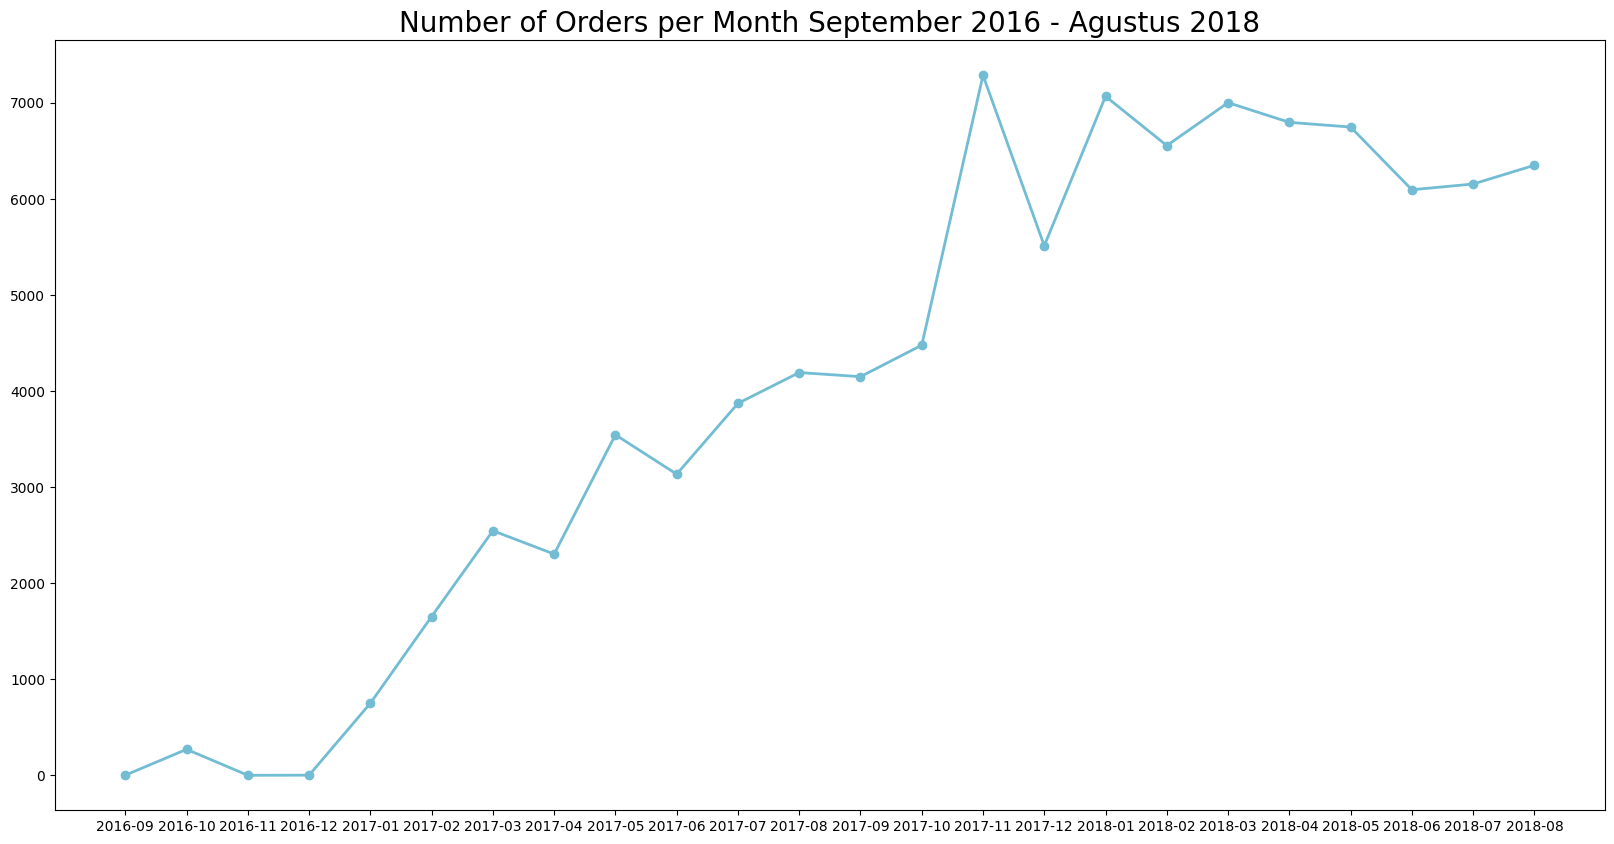

In [107]:
plt.figure(figsize=(20, 10)) 
plt.plot(monthly_orders_df["order_purchase_timestamp"], monthly_orders_df["order_count"], marker='o', linewidth=2, color="#72BCD4") 
plt.title("Number of Orders per Month September 2016 - Agustus 2018", loc="center", fontsize=20) 
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

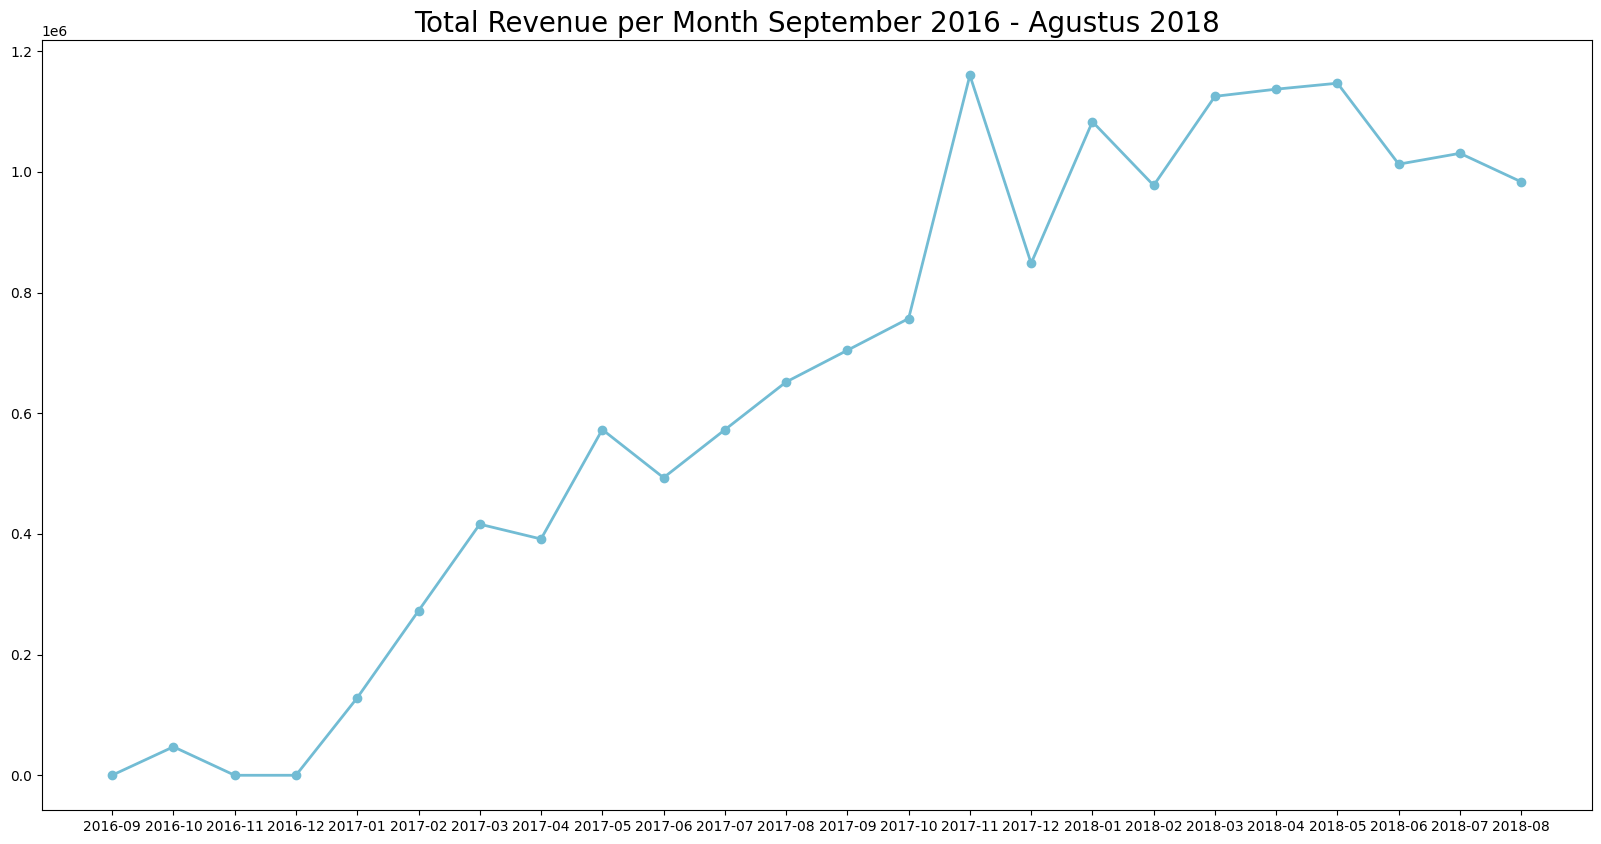

In [108]:
plt.figure(figsize=(20, 10)) 
plt.plot(monthly_orders_df["order_purchase_timestamp"], monthly_orders_df["total_order_value"], marker='o', linewidth=2, color="#72BCD4") 
plt.title("Total Revenue per Month September 2016 - Agustus 2018", loc="center", fontsize=20) 
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

### Pertanyaan 2:

Produk apa yang paling banyak dan paling sedikit terjual?

In [109]:
sum_order_items_df = all_df.groupby("product_category_name").order_item_id.sum().sort_values(ascending=False).reset_index()
sum_order_items_df.head(15)

,product_category_name,order_item_id
0,bed_bath_table,11100.0
1,health_beauty,9508.0
2,sports_leisure,8482.0
3,furniture_decor,8250.0
4,computers_accessories,7697.0
5,housewares,6831.0
6,watches_gifts,5865.0
7,telephony,4427.0
8,garden_tools,4275.0
9,auto,4157.0


C:\Users\Windows 10\AppData\Local\Temp\ipykernel_8816\2334350940.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_item_id", y="product_category_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_8816\2334350940.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_item_id", y="product_category_name", data=sum_order_items_df.sort_values(by="order_item_id", ascending=True).head(5), palette=colors, ax=ax[1])


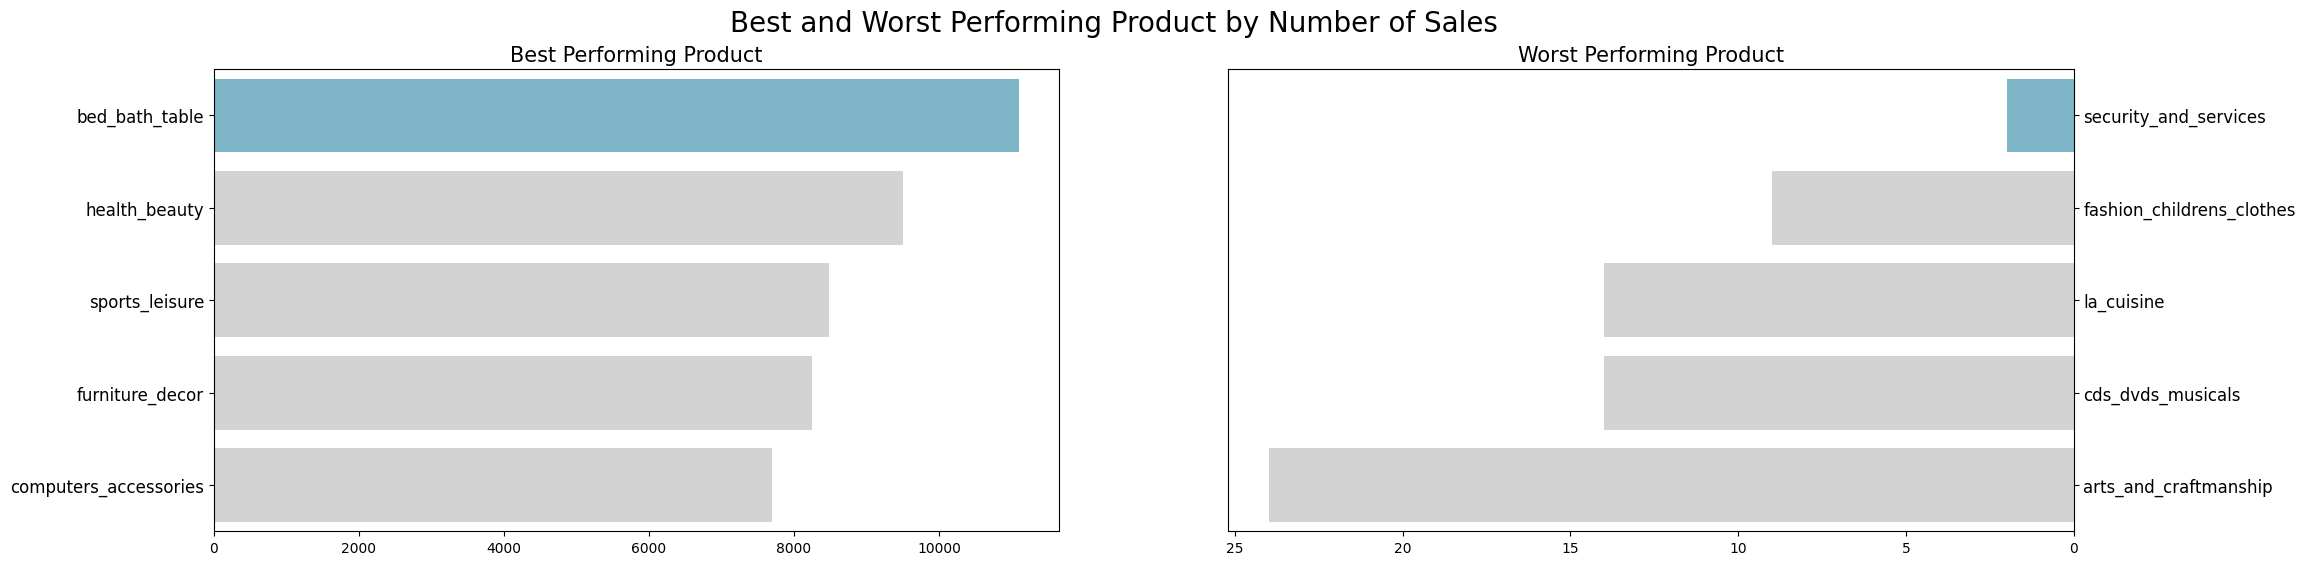

In [110]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(x="order_item_id", y="product_category_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(x="order_item_id", y="product_category_name", data=sum_order_items_df.sort_values(by="order_item_id", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

Produk yang paling banyak terjual adalah bed_bath_table sebanyak 11100 item sedangkan produk yang paling sedikit terjual adalah produk dengan kategori security and service dengan hanya 2 item saja.

### Pertanyaan 3:

Bagaimana demografi pelanggan yang kita miliki?

Pelanggan berdasarkan State

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_8816\787357607.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_8816\787357607.py:5: UserWarning: 
The palette list has fewer values (26) than needed (27) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


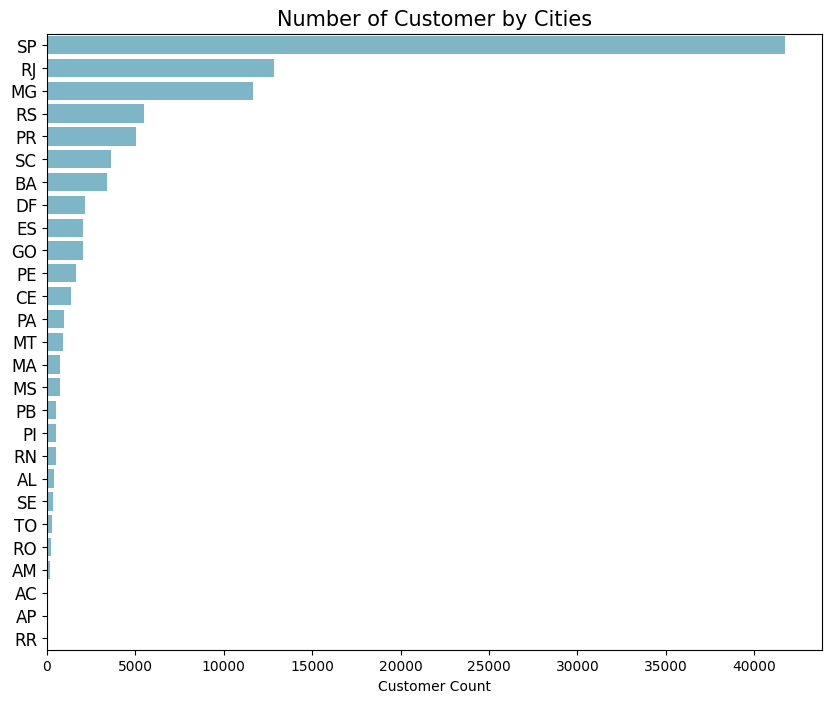

In [111]:
# Assuming the correct column name is "customer_city" (adjust if needed)
colors_ = ["#72BCD4"] * 26

plt.figure(figsize=(10, 8))
sns.barplot(
    x="customer_count", 
    y="customer_state",  # Use the correct column name
    data=bystate_df.sort_values(by="customer_count", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by Cities", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel("Customer Count")
plt.tick_params(axis='y', labelsize=12)
plt.show()

Berdasarkan State-nya pelanggan terbanyak berasal dari PR, diurutan kedua yaitu RJ dan ketiga dari MG.

## RFM Analysis

In [112]:
all_df.describe()

,customer_zip_code_prefix,order_item_id,shipping_limit_date,price,freight_value,total_price,total_freight_value,total_order_value,review_score,order_purchase_timestamp,...,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,99970.000000,97005.000000,97005,97005.000000,97005.000000,97005.000000,97005.000000,97005.000000,96359.000000,97005,...,97005,97005,97005.000000,95637.000000,95637.000000,95637.000000,95637.000000,95637.000000,95637.000000,95637.000000
mean,35141.445304,1.142611,2018-01-08 04:39:00.890427904,125.102344,20.149292,137.088607,22.815287,159.903893,4.155554,2018-01-01 14:53:16.809071872,...,2018-01-14 04:26:12.785743104,2018-01-25 08:49:51.779805184,12.523385,48.878677,792.583393,2.248722,2101.840386,30.155003,16.466765,23.063804
min,1003.000000,1.000000,2016-09-19 23:11:33,0.850000,0.000000,0.850000,0.000000,9.590000,1.000000,2016-09-15 12:16:38,...,2016-10-11 13:46:32,2016-10-04 00:00:00,1.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,11347.000000,1.000000,2017-09-20 21:25:19,41.000000,13.300000,45.900000,13.770000,61.780000,4.000000,2017-09-13 19:38:46,...,2017-09-25 20:06:58,2017-10-05 00:00:00,7.000000,43.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,24416.000000,1.000000,2018-01-26 14:14:38,79.000000,16.350000,85.900000,17.120000,104.860000,5.000000,2018-01-20 12:42:14,...,2018-02-02 16:06:39,2018-02-16 00:00:00,10.000000,52.000000,606.000000,2.000000,700.000000,25.000000,13.000000,20.000000
75%,58900.000000,1.000000,2018-05-10 17:10:26,139.900000,21.190000,149.900000,23.850000,175.870000,5.000000,2018-05-05 10:35:37,...,2018-05-15 20:02:44,2018-05-28 00:00:00,16.000000,57.000000,995.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,99990.000000,21.000000,2020-04-09 22:35:08,6735.000000,409.680000,14998.500000,1794.960000,15070.500000,5.000000,2018-08-29 15:00:37,...,2018-10-17 13:22:46,2018-10-25 00:00:00,210.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000
std,29800.481667,0.540026,NaN,189.770835,15.779709,215.300341,22.386001,225.060244,1.285108,NaN,...,NaN,NaN,9.546804,9.980740,653.530544,1.745379,3755.088589,16.130755,13.296900,11.733579


In [113]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99970 entries, 0 to 99969
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    99970 non-null  object        
 1   customer_unique_id             99970 non-null  object        
 2   customer_zip_code_prefix       99970 non-null  int64         
 3   customer_city                  99970 non-null  object        
 4   customer_state                 99970 non-null  object        
 5   order_id                       97005 non-null  object        
 6   order_item_id                  97005 non-null  float64       
 7   product_id                     97005 non-null  object        
 8   seller_id                      97005 non-null  object        
 9   shipping_limit_date            97005 non-null  datetime64[ns]
 10  price                          97005 non-null  float64       
 11  freight_value  

In [114]:
all_df['order_purchase_timestamp'].max()

Timestamp('2018-08-29 15:00:37')

In [115]:
all_df['order_purchase_timestamp'].min()

Timestamp('2016-09-15 12:16:38')

In [116]:
now=dt.datetime(2018,11,1)
#now=dt.datetime(2018,11,1)

In [117]:
# Calculate Recency, Frequency, and Monetary
rfm = all_df.groupby('customer_id', as_index=False).agg({
    'order_purchase_timestamp': lambda x: (now - x.max()).days,
    'order_id': 'count',  # Count of orders is equivalent to Frequency
    'total_order_value': 'sum'  # Total order value is equivalent to Monetary
})

# Rename columns for consistency
rfm.columns = ['customer_id', 'Recency', 'Frequency', 'Monetary']

# Display the resulting DataFrame
print(rfm.head())

                        customer_id  Recency  Frequency  Monetary
0  00012a2ce6f8dcda20d059ce98491703    351.0          1    114.74
1  000161a058600d5901f007fab4c27140    472.0          1     67.41
2  0001fd6190edaaf884bcaf3d49edf079    610.0          1    195.42
3  0002414f95344307404f0ace7a26f1d5    441.0          1    179.35
4  000379cdec625522490c315e70c7a9fb    212.0          1    107.01


In [118]:
rfm.sort_values(by='Recency',ascending=False)

,customer_id,Recency,Frequency,Monetary
52277,86dc2ffce2dfff336de2f386a786e574,776.0,1,143.46
49183,7ec40b22510fdbea1b08921dd39e63d8,758.0,1,39.09
43698,70fc57eeae292675927697fe03ad3ff5,758.0,1,35.61
46540,7812fcebfc5e8065d31e1bb5f0017dae,758.0,1,40.95
85811,dc607dc98d6a11d5d04d9f2a70aa6c34,758.0,1,92.27
...,...,...,...,...
99317,ffaded93e5a1fce06363cfb6905676a1,NaN,0,0.00
99333,ffb81db92e7ac00ecfac978f673be8a6,NaN,0,0.00
99405,ffe7ffb7c7ae0d42808f387578426b3b,NaN,0,0.00
99434,fffc22669ca576ae3f654ea64c8f36be,NaN,0,0.00


In [119]:
rfm.sort_values(by='Frequency',ascending=False)

,customer_id,Recency,Frequency,Monetary
67758,ae0fb7b01c548c4fd30f19f55453ec4a,471.0,3,128.31
61438,9e29cde4ddb42f9330bcf3c9bc23d177,214.0,3,177.96
71483,b7770073b02ed1d626a027ce86a4ff82,643.0,3,237.87
16408,2a35ad9f439dfc62d35a0202e71d6c66,248.0,3,126.33
41005,6a12f6bdfda32e5f5b85abdda6536326,257.0,2,498.16
...,...,...,...,...
64818,a6d7a64b9eae7e071d6f4250a7dc25a8,NaN,0,0.00
64798,a6c9cacb399083fbf6497249c9d3a140,NaN,0,0.00
64774,a6b360081493d93571023c728c118671,NaN,0,0.00
64762,a6aa8b8c736d70055ab404479f39f528,NaN,0,0.00


In [120]:
rfm.sort_values(by='Monetary',ascending=False)

,customer_id,Recency,Frequency,Monetary
43910,71901689c5f3e5adc27b1dd16b33f0b8,162.0,1,15070.50
8546,1617b1357756262bfa56ab541c47bc16,397.0,1,13664.08
91985,ec5b2ba62e574342386871631fafd3fc,108.0,1,7274.88
77522,c6e2731c5b391845f6800c97401a43a9,626.0,1,6929.31
95124,f48d464a0baaea338cb25f816991ab1f,98.0,1,6922.21
...,...,...,...,...
64818,a6d7a64b9eae7e071d6f4250a7dc25a8,NaN,0,0.00
64798,a6c9cacb399083fbf6497249c9d3a140,NaN,0,0.00
64774,a6b360081493d93571023c728c118671,NaN,0,0.00
64762,a6aa8b8c736d70055ab404479f39f528,NaN,0,0.00


C:\Users\Windows 10\AppData\Local\Temp\ipykernel_8816\633035213.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Recency", x="customer_id", data=rfm.sort_values(by="Recency", ascending=True).head(5), palette=colors, ax=ax[0])
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_8816\633035213.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_8816\633035213.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Frequency", x="customer_id", data=rfm.sort_values(by="Frequency", ascending=False).he

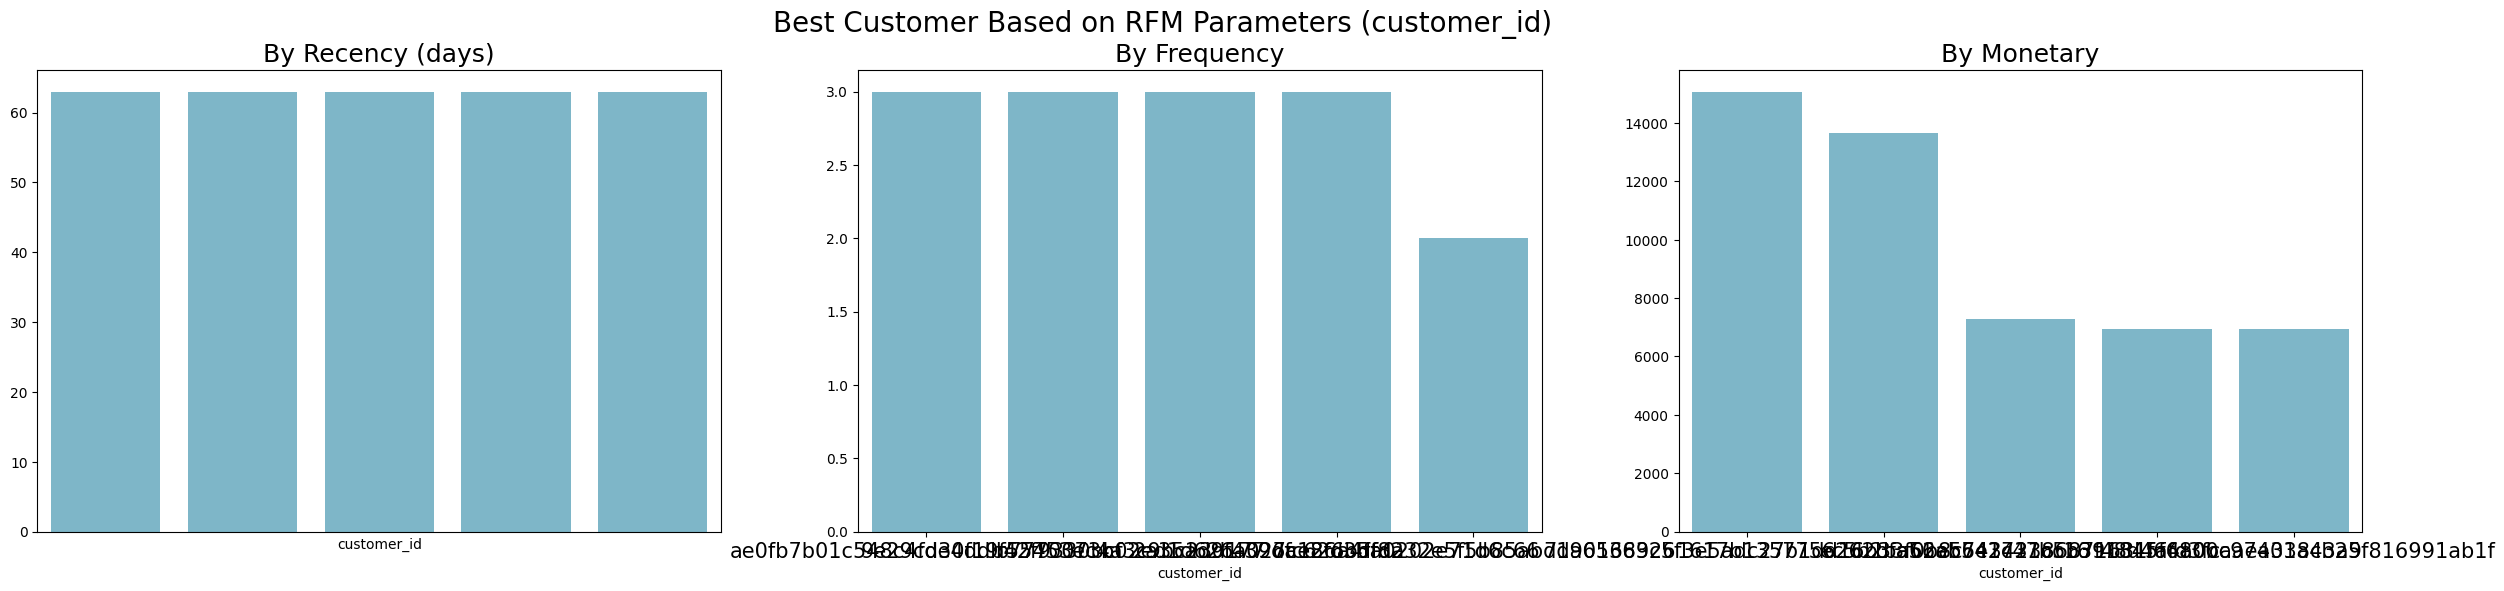

In [121]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="Recency", x="customer_id", data=rfm.sort_values(by="Recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel("customer_id")
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[0].set_xticks([])

sns.barplot(y="Frequency", x="customer_id", data=rfm.sort_values(by="Frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel("customer_id")
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[0].set_xticks([])

sns.barplot(y="Monetary", x="customer_id", data=rfm.sort_values(by="Monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel("customer_id")
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[0].set_xticks([])

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

##### Mengurutkan customer berdasarkan recency, frequency, & monetary score

In [122]:
rfm['r_rank'] = rfm['Recency'].rank(ascending=False)
rfm['f_rank'] = rfm['Frequency'].rank(ascending=True)
rfm['m_rank'] = rfm['Monetary'].rank(ascending=True)

rfm.head()

,customer_id,Recency,Frequency,Monetary,r_rank,f_rank,m_rank
0,00012a2ce6f8dcda20d059ce98491703,351.0,1,114.74,32960.5,50941.0,55293.0
1,000161a058600d5901f007fab4c27140,472.0,1,67.41,16050.0,50941.0,30988.0
2,0001fd6190edaaf884bcaf3d49edf079,610.0,1,195.42,2649.0,50941.0,78989.0
3,0002414f95344307404f0ace7a26f1d5,441.0,1,179.35,20220.5,50941.0,75931.0
4,000379cdec625522490c315e70c7a9fb,212.0,1,107.01,64664.5,50941.0,52083.0


In [123]:
# normalizing the rank of the customers
rfm['r_rank_norm'] = (rfm['r_rank']/rfm['r_rank'].max())*100
rfm['f_rank_norm'] = (rfm['f_rank']/rfm['f_rank'].max())*100
rfm['m_rank_norm'] = (rfm['m_rank']/rfm['m_rank'].max())*100
 
rfm.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)
 
rfm.head()

,customer_id,Recency,Frequency,Monetary,r_rank_norm,f_rank_norm,m_rank_norm
0,00012a2ce6f8dcda20d059ce98491703,351.0,1,114.74,34.166226,51.228134,55.603825
1,000161a058600d5901f007fab4c27140,472.0,1,67.41,16.637124,51.228134,31.162197
2,0001fd6190edaaf884bcaf3d49edf079,610.0,1,195.42,2.745903,51.228134,79.433031
3,0002414f95344307404f0ace7a26f1d5,441.0,1,179.35,20.960185,51.228134,76.357840
4,000379cdec625522490c315e70c7a9fb,212.0,1,107.01,67.029988,51.228134,52.375781


In [124]:
rfm['RFM_score'] = 0.15*rfm['r_rank_norm']+0.28 * \
    rfm['f_rank_norm']+0.57*rfm['m_rank_norm']
rfm['RFM_score'] *= 0.05
rfm_s = rfm.round(2)
rfm_s[['customer_id', 'RFM_score']].head(7)

,customer_id,RFM_score
0,00012a2ce6f8dcda20d059ce98491703,2.56
1,000161a058600d5901f007fab4c27140,1.73
2,0001fd6190edaaf884bcaf3d49edf079,3.00
3,0002414f95344307404f0ace7a26f1d5,3.05
4,000379cdec625522490c315e70c7a9fb,2.71
5,0004164d20a9e969af783496f3408652,1.73
6,000419c5494106c306a97b5635748086,1.71


##### Segmentasi customer berdasarkan RFM_score

In [125]:
rfm_s["customer_segment"] = np.where(
    rfm_s['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm_s['RFM_score'] > 4, "High value customer",(np.where(
            rfm_s['RFM_score'] > 3, "Medium value customer", np.where(
                rfm_s['RFM_score'] > 1.6, 'Low value customers', 'lost customers'))))))

rfm_s[['customer_id', 'RFM_score', 'customer_segment']].head(20)

,customer_id,RFM_score,customer_segment
0,00012a2ce6f8dcda20d059ce98491703,2.56,Low value customers
1,000161a058600d5901f007fab4c27140,1.73,Low value customers
2,0001fd6190edaaf884bcaf3d49edf079,3.00,Low value customers
3,0002414f95344307404f0ace7a26f1d5,3.05,Medium value customer
4,000379cdec625522490c315e70c7a9fb,2.71,Low value customers
5,0004164d20a9e969af783496f3408652,1.73,Low value customers
6,000419c5494106c306a97b5635748086,1.71,Low value customers
7,00046a560d407e99b969756e0b10f282,3.13,Medium value customer
8,00050bf6e01e69d5c0fd612f1bcfb69c,2.09,Low value customers
9,000598caf2ef4117407665ac33275130,4.27,High value customer


In [126]:
customer_segment_df = rfm_s.groupby(by="customer_segment", as_index=False).customer_id.nunique()
customer_segment_df

,customer_segment,customer_id
0,High value customer,2461
1,Low value customers,48334
2,Medium value customer,30591
3,Top customers,47
4,lost customers,18008


In [127]:
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_8816\1016365800.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


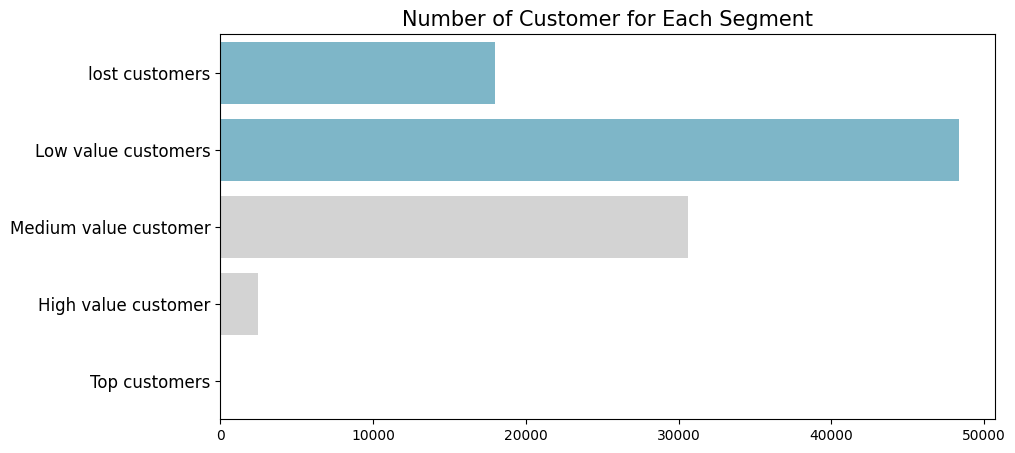

In [128]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="customer_id", 
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    palette=colors_
)
plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

Dari output tersebut, kita bisa melihat bahwa pelanggan telah dibagi menjadi lima segmen: "High value customer", "Low value customers", "Medium value customer", "Top customers", dan "lost customers". Segmen ini mencerminkan variasi dalam interaksi pelanggan dengan perusahaan, mulai dari pelanggan dengan nilai transaksi tertinggi hingga pelanggan yang telah hilang

Pelanggan dengan segmen "Top customers" memiliki jumlah paling sedikit dibandingkan dengan segmen lainnya. Sebaliknya, segmen "Low value customers" memiliki jumlah pelanggan yang paling banyak. Ini menunjukkan bahwa perusahaan memiliki sejumlah besar pelanggan yang kurang aktif atau berpotensi untuk hilang. Selain itu perusahaan juga telah kehilangan sekitar 18 ribu customer.

## Conclusion

##### Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?



Data pembelian customer mengalami kenaikan dari tahun 2016 ke 2018, tren juga cenderung naik. Penjualan terbanyak dan revenue terbesar terjadi pada Bulan November 2017.

##### Produk apa yang paling banyak dan paling sedikit terjual?

Berdasarkan data yang divisualisasikan, produk yang paling banyak terjual adalah bed_bath_table sebanyak 11100 item sedangkan produk yang paling sedikit terjual adalah produk dengan kategori security and service dengan hanya 2 item saja.

##### Bagaimana demografi pelanggan yang kita miliki?

Berdasarkan State-nya pelanggan terbanyak berasal dari PR, diurutan kedua yaitu RJ dan ketiga dari MG.